# This is the Doc File for Test_Audio_Tools
The purpose of this folder is to make test software showing how to make the PCM1808 appear like a sound card input to a computer connected to the USB port of the Pico.

##  Bugs
### I2S Data Ceases after Two Seconds
This appears to be a hardware bug.  I can make it happen with the haywire module to Pico W by smashing the two boards together.  It disappears when I stretch them apart like this.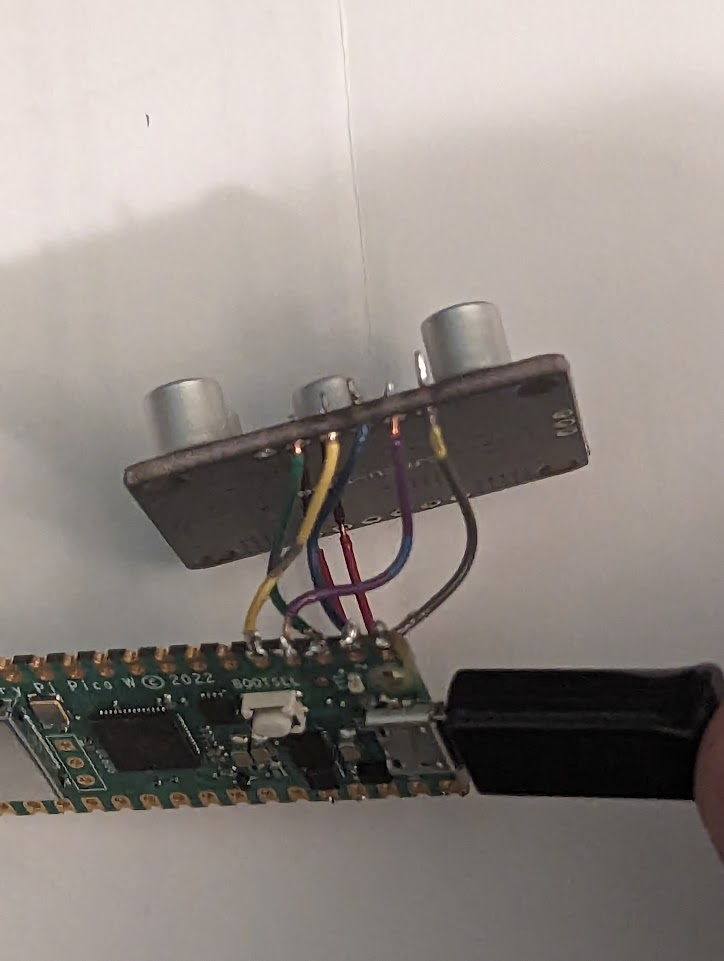  It appears that we should have used a four layer board or taken more care with the layout perhaps.  I took the 220pF capactior on LRCK out of the circuit, but it made no difference.  I started trying to see what the waveforms looked like, to try to figure out what might be the problem, but nothing is glaring.  The SDR-TRX boards do not have this problem.  The file I am using to test for the issue is Arduino-PicoSimpleInput.cpp.  There is a note in the datasheet that may be a hint on what is happening.  It says:
>In slave mode, the PCM1808 device operates under LRCK (pin 7), synchronized with system clock SCKI (pin 6).
The PCM1808 device does not require a specific phase relationship between LRCK and SCKI, but does require
the synchronization of LRCK and SCKI.
If the relationship between LRCK and SCKI changes more than ±6 BCKs for 64 BCK/frame (±5 BCKs for 48
BCK/frame) during one sample period due to LRCK or SCKI jitter, internal operation of the ADC halts within 1 / fS
and digital output goes to zero data (BPZ code) until resynchronization between LRCK and SCKI occurs.
In the case of changes less than ±5 BCKs for 64 BCK/frame (±4 BCKs for 48 BCK/frame), resynchronization
does not occur, and the previously described digital output control and discontinuity do not occur.